# LSTM-RNN For Sentiment Analysis
Author: Trilby Hren and Costa Huang

**Our project has three main parts:**
* Reproduce and understand Keras official demo code on LSTM-RNN for sentiment analysis 
 * [imdb_lstm.py](https://github.com/fchollet/keras/blob/master/examples/imdb_lstm.py) Main program that rains a LSTM on the IMDB sentiment classification task.
 * [imdb.py](https://github.com/fchollet/keras/blob/master/keras/datasets/imdb.py) Preprocessing script of IMDB movie review dataset
* Improve the program's accuracy by exploring different techniques:
 * Preprocessing techniques
 * Activation functions
 * Optimizer choices
* Futher application
 * Visualization of sentiment analysis
 * Applied our result to Amazon Review Datas



## Baseline algorithm (Demo code from Keras)
Firstly we execute [imdb_lstm.py](https://github.com/fchollet/keras/blob/master/examples/imdb_lstm.py) and yields following results:

In [1]:
'''Trains a LSTM on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
Notes:
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2))  # try using a GRU instead, for fun
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=10,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Using Theano backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
X_train shape: (25000, 80)
X_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 138s - loss: 0.5333 - acc: 0.7316 - val_loss: 0.4631 - val_acc: 0.7898
Epoch 2/10
25000/25000 [==============================] - 144s - loss: 0.3812 - acc: 0.8358 - val_loss: 0.3776 - val_acc: 0.8370
Epoch 3/10
25000/25000 [==============================] - 147s - loss: 0.3077 - acc: 0.8737 - val_loss: 0.3687 - val_acc: 0.8360
Epoch 4/10
25000/25000 [==============================] - 146s - loss: 0.2497 - acc: 0.8979 - val_loss: 0.4161 - val_acc: 0.8322
Epoch 5/10
25000/25000 [==============================] - 149s - loss: 0.2100 - acc: 0.9180 - val_loss: 0.4277 - val_acc: 0.8330
Epoch 6/10
25000/25000 [==============================] - 151s - loss: 0.1801 - acc: 0.9298 - val_loss: 0.4318 - val_acc: 0.8362
Epoch 7/1

## Understanding the source code
Preprocessing
* Original Dataset is provided by a [Stanford research group](http://ai.stanford.edu/~amaas//data/sentiment/)
* Keras already tokenize the data where each review is encoded as a sequence of word indexes
* Pad each reviews to 80 words

Model Building
* Embedding layer: Map each word into 128 dimentional vector space
* LSTM layer: 
* Dense(1): fully connect LSTM to create one demensional output
* Sigmoid
* Adam optimizer for training.



## Improving the algorithm
Activation functions by [Keras.layers.core.Activation](https://keras.io/activations/)
* Sigmoid
* Relu
* Tanh
* Hard sigmoid
Check out our [Activation functions data](https://docs.google.com/document/d/1uQ49jhYYOmwzSPxYYamTXYCq-07Dhhu75eleew3LBPU/edit?usp=sharing)


Optimizer choices by [keras.optimizers](https://keras.io/optimizers/)
* SGD (Stochastic Gradient Decent)
* Adam
* RMSprop
* Adagrad
* Nadam
Check out our [Optimizer choices data](https://docs.google.com/document/d/1YI5wluhh3rqHs8LBqqL2vOxqNwZdYiPHstWkS2_1s4s/edit?usp=sharing)

Preprocessing techniques
* Padding for each reviews
* Skip x most frequent words


[0.709, 0.8402]
[0.8205, 0.837]


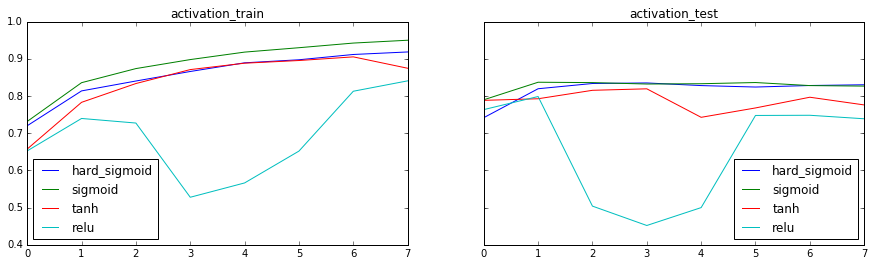

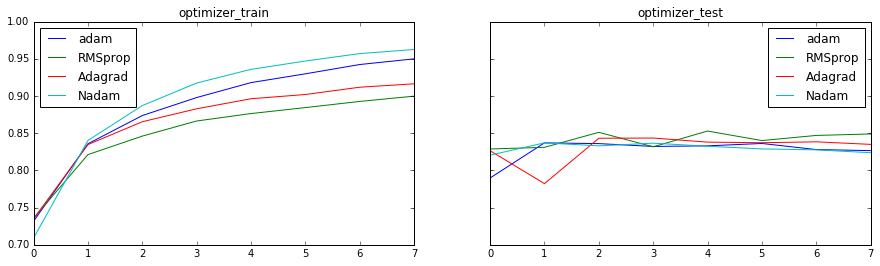

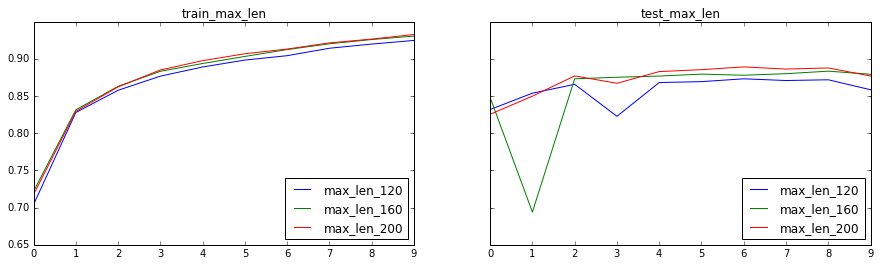

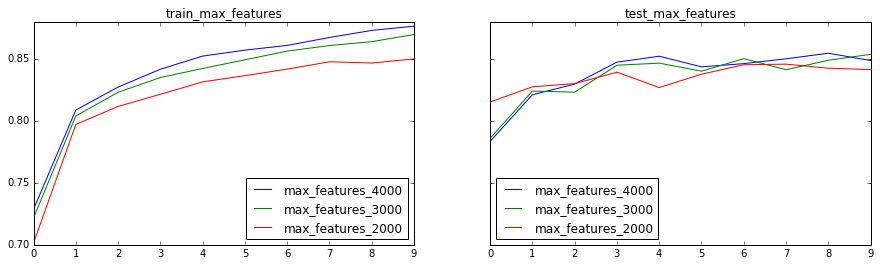

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

""" get data from model generated text; we further used this script to get datas below. """
model_output = "Epoch 1/8 - acc: 0.7090 - val_acc: 0.8205 Epoch 2/8 - acc: 0.8402 - val_acc: 0.8370 , ...."
data_list = re.findall(r'acc: (\d+\.\d+)', model_output)
data_list = list(map(float, data_list))
print(data_list[::2])
print(data_list[1::2])

""" activation function data """
train_hard_sigmoid = pd.DataFrame({'hard_sigmoid': [0.72,0.8137,0.8403,0.8659,0.8892,0.8974,0.9116,0.9184]})
train_sigmoid = pd.DataFrame({'sigmoid': [0.7316,0.8358,0.8737,0.8979,0.9180,0.9298,0.9423,0.9499]})
train_tanh = pd.DataFrame({'tanh': [0.6574,0.7830,0.8335,0.8710,0.8882,0.8954,0.9052,0.8746]})
train_relu = pd.DataFrame({'relu': [0.6524,0.7396,0.7273,0.5278,0.5663,0.6519,0.8128,0.8407]})
activation_train = pd.concat([train_hard_sigmoid,train_sigmoid,train_tanh,train_relu], axis = 1)

test_hard_sigmoid = pd.DataFrame({'hard_sigmoid': [0.7417,0.8195,0.8336,0.8351,0.8280,0.8241,0.8282,0.8302]})
test_sigmoid = pd.DataFrame({'sigmoid': [0.7898,0.8370,0.8360,0.8322,0.8330,0.8362,0.8280,0.8266]})
test_tanh = pd.DataFrame({'tanh': [0.7883,0.7926,0.8153,0.8193,0.7427,0.7679,0.7967,0.7760]})
test_relu = pd.DataFrame({'relu': [0.7634,0.7986,0.5040,0.4519,0.5000,0.7477,0.7482,0.7388]})
activation_test = pd.concat([test_hard_sigmoid,test_sigmoid, test_tanh, test_relu], axis = 1)


""" optimizer data """
train_adam = pd.DataFrame({'adam': [0.7316, 0.8358, 0.8737, 0.8979, 0.918, 0.9298, 0.9423, 0.9499]})
train_RMSprop = pd.DataFrame({'RMSprop': [0.7357, 0.8212, 0.8461, 0.8664, 0.8764, 0.8844, 0.8927, 0.8998]})
train_Adagrad = pd.DataFrame({'Adagrad': [0.7349, 0.8347, 0.8654, 0.8828, 0.8963, 0.902, 0.9118, 0.9164]})
train_Nadam = pd.DataFrame({'Nadam': [0.709, 0.8402, 0.8871, 0.9174, 0.9358, 0.947, 0.957, 0.9625]})
optimizer_train = pd.concat([train_adam,train_RMSprop,train_Adagrad,train_Nadam], axis = 1)


test_adam = pd.DataFrame({'adam': [0.7898, 0.837, 0.836, 0.8322, 0.833, 0.8362, 0.828, 0.8266]})
test_RMSprop = pd.DataFrame({'RMSprop': [0.8288, 0.831, 0.8512, 0.8317, 0.8529, 0.8401, 0.847, 0.849]})
test_Adagrad = pd.DataFrame({'Adagrad': [0.8264, 0.7822, 0.8432, 0.8435, 0.838, 0.8372, 0.8384, 0.835]})
test_Nadam = pd.DataFrame({'Nadam': [0.8205, 0.837, 0.833, 0.8366, 0.8325, 0.8289, 0.8276, 0.8238]})
optimizer_test = pd.concat([test_adam,test_RMSprop,test_Adagrad,test_Nadam], axis = 1)


""" preprocessing data """
train_max_len_120 = pd.DataFrame({'max_len_120': [0.7041, 0.8279, 0.8577, 0.8767, 0.889, 0.8983, 0.9042, 0.9142, 0.9198, 0.9247]})
train_max_len_160 = pd.DataFrame({'max_len_160': [0.722, 0.8315, 0.863, 0.8832, 0.8937, 0.9032, 0.9124, 0.9202, 0.9259, 0.9305]})
train_max_len_200 = pd.DataFrame({'max_len_200': [0.7176, 0.8294, 0.8623, 0.885, 0.8975, 0.9068, 0.9131, 0.9214, 0.9265, 0.9327]})
train_max_len = pd.concat([train_max_len_120,train_max_len_160,train_max_len_200], axis = 1)

test_max_len_120 = pd.DataFrame({'max_len_120': [0.8318, 0.8538, 0.8657, 0.8227, 0.8681, 0.8693, 0.8731, 0.8708, 0.8718, 0.8584]})
test_max_len_160 = pd.DataFrame({'max_len_160': [0.8481, 0.694, 0.8731, 0.8752, 0.8768, 0.8794, 0.8779, 0.88, 0.8834, 0.8792]})
test_max_len_200 = pd.DataFrame({'max_len_200': [0.8254, 0.8498, 0.877, 0.8671, 0.8828, 0.8854, 0.8891, 0.8862, 0.8877, 0.8769]})
test_max_len = pd.concat([test_max_len_120,test_max_len_160,test_max_len_200], axis = 1)

train_max_features_4000 = pd.DataFrame({'max_features_4000': [0.7287, 0.8087, 0.8272, 0.8416, 0.8522, 0.857, 0.8608, 0.8672, 0.8729, 0.8763]})
train_max_features_3000 = pd.DataFrame({'max_features_3000': [0.7218, 0.8039, 0.823, 0.8349, 0.8422, 0.8492, 0.8562, 0.8607, 0.8638, 0.8696]})
train_max_features_2000 = pd.DataFrame({'max_features_2000': [0.7016, 0.7971, 0.8116, 0.8214, 0.8314, 0.8364, 0.8417, 0.8476, 0.8466, 0.8499]})
train_max_features = pd.concat([train_max_features_4000,train_max_features_3000,train_max_features_2000], axis = 1)

test_max_features_4000 = pd.DataFrame({'max_features_4000': [0.7834, 0.821, 0.8296, 0.8473, 0.8521, 0.8435, 0.8461, 0.85, 0.8545, 0.8486]})
test_max_features_3000 = pd.DataFrame({'max_features_3000': [0.7859, 0.824, 0.8231, 0.8448, 0.8465, 0.84, 0.8501, 0.8412, 0.8488, 0.8536]})
test_max_features_2000 = pd.DataFrame({'max_features_2000': [0.8152, 0.8274, 0.83, 0.8392, 0.8268, 0.8376, 0.8452, 0.8457, 0.8424, 0.8413]})
test_max_features = pd.concat([test_max_features_4000,test_max_features_3000,test_max_features_2000], axis = 1)

""" plotting """
%matplotlib inline
f1, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f1.set_figwidth(15)
activation_train.plot(ax = ax1, title = "activation_train")
activation_test.plot(ax = ax2, title = "activation_test")

f2, (ax3, ax4) = plt.subplots(1, 2, sharey=True)
f2.set_figwidth(15)
optimizer_train.plot(ax = ax3,title = "optimizer_train")
optimizer_test.plot(ax = ax4,title = "optimizer_test")

f3, (ax5, ax6) = plt.subplots(1, 2, sharey=True)
f3.set_figwidth(15)
train_max_len.plot(ax = ax5,title = "train_max_len")
test_max_len.plot(ax = ax6,title = "test_max_len")

f4, (ax7, ax8) = plt.subplots(1, 2, sharey=True)
f4.set_figwidth(15)
train_max_features.plot(ax = ax7,title = "train_max_features")
test_max_features.plot(ax = ax8,title = "test_max_features")

## Building New Model
After such comparision, we decided to build model using *RMSprop* optimizer, *sigmoid* activation function, *max_features* = 3000, and *max_len*= 200.

In [3]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.layers.wrappers import TimeDistributed
import pickle
from six.moves import cPickle
import pandas as pd
import math
import matplotlib.pyplot as plt


max_features = 3000
maxlen = 200  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(XX_train, y_train), (XX_test, y_test) = imdb.load_data(path='imdb_full.pkl', nb_words=max_features, skip_top=10,
              maxlen=None, seed=113,
              start_char=1, oov_char=2, index_from=0)
print(len(XX_train), 'train sequences')
print(len(XX_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(XX_train, maxlen=maxlen)
X_test = sequence.pad_sequences(XX_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2))  # try using a GRU instead, for fun
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=10,
          validation_data=(X_test, y_test))

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
X_train shape: (25000, 200)
X_test shape: (25000, 200)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 288s - loss: 0.5716 - acc: 0.6874 - val_loss: 0.3979 - val_acc: 0.8376
Epoch 2/10
25000/25000 [==============================] - 289s - loss: 0.4373 - acc: 0.8071 - val_loss: 0.3447 - val_acc: 0.8603
Epoch 3/10
25000/25000 [==============================] - 297s - loss: 0.3914 - acc: 0.8336 - val_loss: 0.3410 - val_acc: 0.8577
Epoch 4/10
25000/25000 [==============================] - 301s - loss: 0.3526 - acc: 0.8508 - val_loss: 0.3228 - val_acc: 0.8604
Epoch 5/10
25000/25000 [==============================] - 305s - loss: 0.3224 - acc: 0.8631 - val_loss: 0.2915 - val_acc: 0.8782
Epoch 6/10
25000/25000 [==============================] - 302s - loss: 0.3031 - acc: 0.8756 - val_loss: 0.3119 - val_acc: 0.8671
Epoch 7

## Further Applications
Visualization of sentiment analysis ,inspired by [Taylor Arnold's jupyter notebook](http://euler.stat.yale.edu/~tba3/stat665/lectures/lec21/notebook21.html)

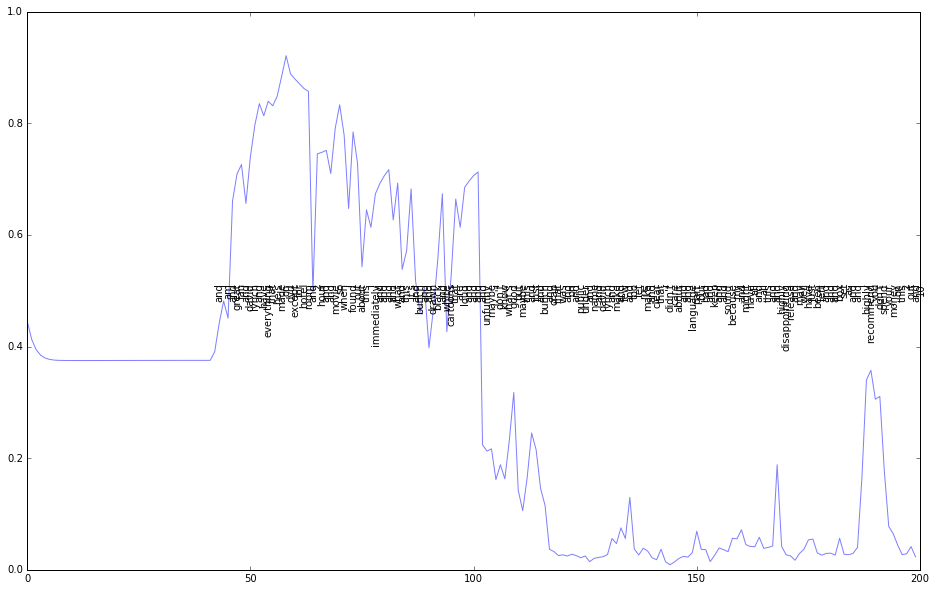

In [4]:
%matplotlib inline
from keras.layers.wrappers import TimeDistributed
import pickle
from six.moves import cPickle
import pandas as pd
import math
import matplotlib.pyplot as plt

def reconstruct_text(index, index_to_word):
    text = []
    for ind in index:
        if ind != 0:
            text += [index_to_word[ind]]
        else:
            text += [""]
    return text

word_to_index = imdb.get_word_index()
index_to_word = {k:v for v,k in word_to_index.items()}
f = open('imdb_full.pkl', 'rb')
(x_train, labels_train), (x_test, labels_test) = cPickle.load(f)
f.close()
df = pd.DataFrame(x_train)

model2 = Sequential()
model2.add(Embedding(max_features, 128, dropout=0.2))
model2.add(LSTM(128, dropout_W=0.2, dropout_U=0.2, return_sequences=True))  # try using a GRU instead, for fun
model2.add(TimeDistributed(Dense(1)))
model2.add(Activation('sigmoid'))
model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model2.set_weights(model.get_weights())
y_hat2 = model2.predict(X_train)

ind = 100
tokens = reconstruct_text(X_train[ind], index_to_word)

plt.figure(figsize=(16, 10))
plt.plot(y_hat2[ind],alpha=0.5)
for i in range(len(tokens)):
    plt.text(i,0.5,tokens[i],rotation=90)

## Apply Current Model to Amazon Review Data
Amazon Review Dataset has preclassified sentiment value on 6 categories: books, camera, dvd, health, music, software. We need to complie data in a specific way so that our current model can directly use it.

### 1. Change File Structure
We will split the reviews into training set and testing set by changing the file structure

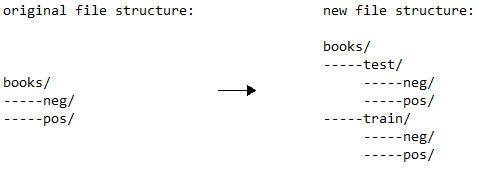

In [5]:
from IPython.display import Image
i = Image(filename='file_structure.png')
i

### 2. Preprocess Amazon Reviews
**Load reviews:**

In [6]:
from six.moves import cPickle
import numpy
import os
import pandas as pd
import string
from collections import Counter
from keras.preprocessing.text import Tokenizer

path = ["books/", "camera/", "dvd/", "health/", "music/", "software/"]  # camera, has missing data
ff = []
input_label = []
for i in range(6):
    ff += [path[i] + "train/pos/" + x for x in os.listdir(path[i] + "train/pos")] + \
         [path[i] + "train/neg/" + x for x in os.listdir(path[i] + "train/neg")] + \
         [path[i] + "test/pos/" + x for x in os.listdir(path[i] + "test/pos")] + \
         [path[i] + "test/neg/" + x for x in os.listdir(path[i] + "test/neg")]
    
    # Because of missing data, we need to measure how many reviews are there in each folder in order to label them correctly.
    train_pos = len(os.listdir(path[i] + "train/pos"))
    train_neg = len(os.listdir(path[i] + "train/neg"))
    test_pos = len(os.listdir(path[i] + "test/pos"))
    test_neg = len(os.listdir(path[i] + "test/neg"))
    input_label += [1] * train_pos + [0] * train_neg + [1] * test_pos + [0] * test_neg
    
      
input_text  = []
for f in ff:
    with open(f, 'rb') as fin:
        temp = fin.read().splitlines()
        x = " ".join([x.decode("utf-8", errors = 'ignore') for x in temp])
        input_text += [x]
        
print(input_text[0])

I wish I could give this book four and a half stars instead of four; I can't quite justify five stars in my mind.  Two of the stories were definitely good: the first, "masked Riders" by Parhelion, and the third, "Ricochet" by BA Tortuga.  I enjoyed both, but was not particularly snowed by the intensity of the conflict/plot line or the main characters and their relationships.  Not so the second story: "Hung Up" by Cat Kane was a powerful, intense and moving story about two delightful yet flawed characters who had secrets that tore their relationship up until they were able to work their ways (separately) around the issues.  That story deserved a five stars plus rating and I wish Kane would turn it into a full length novel and develop the characters and their backgrounds more.  This book is an excellent read both for the plot line and the erotic substance.  Enjoy


**Tokenize reviews:**

In [7]:
input_text  = []
for f in ff:
    with open(f, 'rb') as fin:
        temp = fin.read().splitlines()
        x = " ".join([x.decode("utf-8", errors = 'ignore') for x in temp])
        input_text += [x]

cut_index = int(len(input_text)/2)
tok = Tokenizer()
tok.fit_on_texts(input_text[:cut_index])

X_train = tok.texts_to_sequences(input_text[:cut_index])
X_test  = tok.texts_to_sequences(input_text[cut_index:])
y_train = input_label[:cut_index]
y_test  = input_label[cut_index:]

print("As you can see, the first review has been encoded as their word index:")
print(X_train[0][:10])

As you can see, the first review has been encoded as their word index:
[6, 499, 6, 99, 221, 9, 22, 501, 2, 3]


**Reconstruct reviews:**

In [8]:
words = {k:v for v,k in tok.word_index.items()}
def reconstruct_text(index, words):
    text = []
    for ind in index:
        if ind != 0:
            text += [words[ind]]
        else:
            text += [""]
    return text
    
print(input_text[100])
print(reconstruct_text(X_train[100], words))

Peck relates growing up in rural/small town Vermont with a best friend who gets him into lots of trouble. Humor and pranks abound in between lessons learned
['peck', 'relates', 'growing', 'up', 'in', 'rural', 'small', 'town', 'vermont', 'with', 'a', 'best', 'friend', 'who', 'gets', 'him', 'into', 'lots', 'of', 'trouble', 'humor', 'and', 'pranks', 'abound', 'in', 'between', 'lessons', 'learned']


**Store reviews: **

In [9]:
f = open('amzn_full.pkl', 'wb')
train_tuple = (X_train, y_train)
test_tuple = (X_test, y_test)
combine = (train_tuple, test_tuple)
cPickle.dump(combine, f)
f.close()

### 3. Apply Current Model to Amazon Reviews:
Firstly we need to make a copy of [imdb.py](https://github.com/fchollet/keras/blob/master/keras/datasets/imdb.py)(the script that loads imdb_full.pkl data) and make it loads our amzn_full.pkl instead. Name the new file amzn.py. Then we apply our model:

In [10]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
import amzn
from keras.layers.wrappers import TimeDistributed
import pickle
from six.moves import cPickle
import pandas as pd
import math
import matplotlib.pyplot as plt


max_features = 3000
maxlen = 200  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(XX_train, y_train), (XX_test, y_test) = amzn.load_data(path='amzn_full.pkl', nb_words=max_features)
print(len(XX_train), 'train sequences')
print(len(XX_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(XX_train, maxlen=maxlen)
X_test = sequence.pad_sequences(XX_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2))  # try using a GRU instead, for fun
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=10,
          validation_data=(X_test, y_test))

Loading data...
5957 train sequences
5957 test sequences
Pad sequences (samples x time)
X_train shape: (5957, 200)
X_test shape: (5957, 200)
Build model...
Train...
Train on 5957 samples, validate on 5957 samples
Epoch 1/10
5957/5957 [==============================] - 63s - loss: 0.6823 - acc: 0.5587 - val_loss: 0.6493 - val_acc: 0.6325
Epoch 2/10
5957/5957 [==============================] - 63s - loss: 0.5696 - acc: 0.7082 - val_loss: 0.5350 - val_acc: 0.7386
Epoch 3/10
5957/5957 [==============================] - 68s - loss: 0.4870 - acc: 0.7692 - val_loss: 0.5081 - val_acc: 0.7480
Epoch 4/10
5957/5957 [==============================] - 70s - loss: 0.4290 - acc: 0.8054 - val_loss: 0.8713 - val_acc: 0.6157
Epoch 5/10
5957/5957 [==============================] - 60s - loss: 0.3910 - acc: 0.8348 - val_loss: 0.5099 - val_acc: 0.7646
Epoch 6/10
5957/5957 [==============================] - 60s - loss: 0.3738 - acc: 0.8385 - val_loss: 0.5034 - val_acc: 0.7702
Epoch 7/10
5957/5957 [=========

## Compare Result to Original Model

In [11]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
import amzn

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(X_train, y_train), (X_test, y_test) = amzn.load_data(path='amzn_full.pkl', nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2))  # try using a GRU instead, for fun
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=10,
          validation_data=(X_test, y_test))

Loading data...
5957 train sequences
5957 test sequences
Pad sequences (samples x time)
X_train shape: (5957, 80)
X_test shape: (5957, 80)
Build model...
Train...
Train on 5957 samples, validate on 5957 samples
Epoch 1/10
5957/5957 [==============================] - 31s - loss: 0.6641 - acc: 0.5949 - val_loss: 0.5708 - val_acc: 0.7077
Epoch 2/10
5957/5957 [==============================] - 31s - loss: 0.4679 - acc: 0.7823 - val_loss: 0.5437 - val_acc: 0.7326
Epoch 3/10
5957/5957 [==============================] - 31s - loss: 0.3293 - acc: 0.8687 - val_loss: 0.5521 - val_acc: 0.7521
Epoch 4/10
5957/5957 [==============================] - 31s - loss: 0.2428 - acc: 0.9077 - val_loss: 0.5821 - val_acc: 0.7601
Epoch 5/10
5957/5957 [==============================] - 31s - loss: 0.1790 - acc: 0.9347 - val_loss: 0.7185 - val_acc: 0.7408
Epoch 6/10
5957/5957 [==============================] - 31s - loss: 0.1270 - acc: 0.9542 - val_loss: 0.7469 - val_acc: 0.7519
Epoch 7/10
5957/5957 [===========